In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import scipy

from uv_analysis import UVVisProcessor, UVVisAnalyser, UVVisVisualiser

Found files: ['PolymerB_0.txt', 'PolymerB_1.txt', 'PolymerB_2.txt', 'PolymerB_3.txt', 'PolymerB_4.txt', 'PolymerB_5.txt']
spectrum_0 values are too high, omitting
[320, 449]


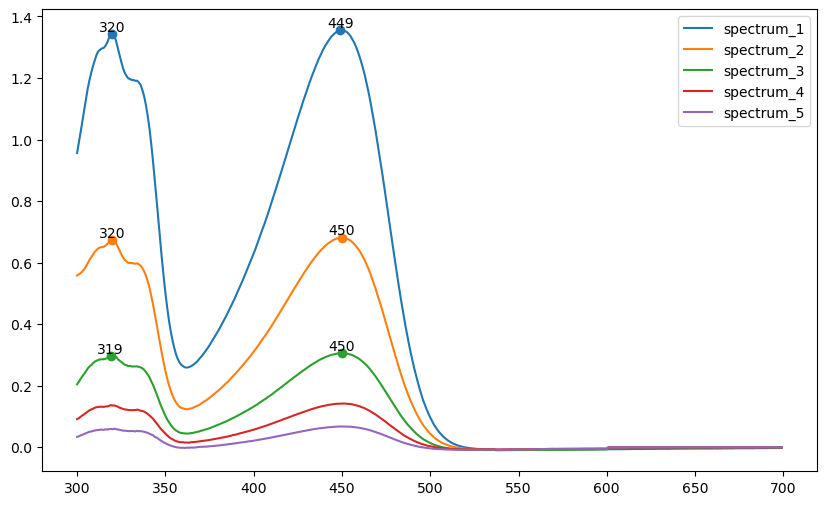

In [2]:
def main():
    processor = UVVisProcessor(min_wl=300,max_wl=700)
    spectra = processor.batch_import('PolymerB')
    spectra.head()

    analyser = UVVisAnalyser(height=0.02,width=4)
    
    peaks, absorbances = analyser.fit_peaks(spectra.iloc[:,0])
    print(peaks)
    lambda_max = analyser.find_lambda_max(spectra['spectrum_2'])
    analyser.get_absorbance(spectra,lambda_max)

    visualiser = UVVisVisualiser()
    visualiser.plot_spectra(spectra,show_peaks=True,peak_analyser=analyser)

main()